In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Zillow_Ohio_csv = "Resources/Zillow_OH_CSV.csv"
crime2017_csv = "Resources/OhioCrime2017_NoNan.csv"
crime2016_csv = "Resources/OhioCrime2016_NoNan.csv"

In [3]:
zillow_df = pd.read_csv(Zillow_Ohio_csv)
crime2017_df = pd.read_csv(crime2017_csv)
crime2017_df = crime2017_df.fillna(0)
crime2017_df['County'] = crime2017_df['County'].str.upper()
crime2017_df.head()


crime2016_df = pd.read_csv(crime2016_csv)
crime2016_df = crime2016_df.fillna(0)
crime2016_df['County'] = crime2016_df['County'].str.upper()
crime2016_df.head()

,Unnamed: 0,County,City,AGENCY NAME,POPULATION,VIOLENT CRIME,PROPERTY CRIME,MURDER,RAPE,ROBBERY,AGGRAVATED ASSAULT,BURGLARY,LARCENY,MTR VEHICLE THEFT,ARSON
0,9,ALLEN COUNTY,Lima,LIMA,"37,715",356,"2,259",8,44,123,181,602,"1,540",117,22
1,10,ALLEN COUNTY,Bluffton,BLUFFTON,"3,953",1,78,0,0,1,0,15,59,4,0
2,11,ALLEN COUNTY,Delphos,DELPHOS,"3,884",2,83,0,1,0,1,13,69,1,0
3,12,ALLEN COUNTY,Spencerville,SPENCERVILLE,"2,195",1,28,0,0,0,1,5,23,0,1
4,13,ALLEN COUNTY,Elida,ELIDA,"1,852",0,16,0,0,0,0,3,12,1,0


In [4]:
zillow_df['CountyName'] = zillow_df['CountyName'].str.upper()
zillow_df.head()

zillow_df.columns

Index(['Index', 'RegionID', 'RegionName', 'City', 'State', 'Metro',
       'CountyName', 'SizeRank', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

In [5]:
merge_Zillow_Crime2017_df = pd.merge(zillow_df, crime2017_df, how='left', left_on="City", right_on="City")
merge_Zillow_Crime2017_df.head()
merge_Zillow_Crime2017_df.to_csv("Resources/mergeData/MergeCrime2017_Zillow.csv")

merge_Zillow_Crime2017_df.head()

,Index,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2007,2008,...,VIOLENT CRIME,PROPERTY CRIME,MURDER,RAPE,ROBBERY,AGGRAVATED ASSAULT,BURGLARY,LARCENY,MTR VEHICLE THEFT,ARSON
0,1,77007,44107,Lakewood,OH,Cleveland-Elyria,CUYAHOGA COUNTY,84,1580500,1477700,...,74,"1,199",2.0,6.0,40,26,469,652,78,5.0
1,2,76953,44035,Elyria,OH,Cleveland-Elyria,LORAIN COUNTY,92,1301200,1220800,...,191,"1,146",3.0,39.0,64,85,248,842,56,12.0
2,3,76511,43081,Westerville,OH,Columbus,FRANKLIN COUNTY,117,2227300,2195200,...,35,740,0.0,9.0,13,13,60,667,13,2.0
3,3,76511,43081,Westerville,OH,Columbus,FRANKLIN COUNTY,117,2227300,2195200,...,9,205,0.0,3.0,3,3,17,184,4,0.0
4,4,76971,44060,Mentor,OH,Cleveland-Elyria,LAKE COUNTY,134,2126100,2020200,...,72,908,0.0,11.0,17,44,105,780,23,6.0


In [6]:
#merge_Zillow_Crime2017_df = merge_Zillow_Crime2017_df.rename(columns={"City" : "FinalCity"})
plot_Zillow_Crime2017_df = merge_Zillow_Crime2017_df[["City","CountyName","2017","POPULATION","VIOLENT CRIME"]]

plot_Zillow_Crime2017_df = plot_Zillow_Crime2017_df.sort_values("POPULATION",ascending=False)
plot_Zillow_Crime2017_df.head()

plot_Zillow_Crime2017_df["POPULATION"] = pd.to_numeric(plot_Zillow_Crime2017_df["POPULATION"])
plot_Zillow_Crime2017_df["POPULATION"].dtype

dtype('float64')

In [9]:
cityName1 = plot_Zillow_Crime2017_df.iloc[0:20]
cityName1

,City,CountyName,2017,POPULATION,VIOLENT CRIME
187,Columbus,FRANKLIN COUNTY,2865400,853424.0,"4,379"
54,Columbus,FRANKLIN COUNTY,1057800,853424.0,"4,379"
44,Columbus,FRANKLIN COUNTY,1008900,853424.0,"4,379"
198,Columbus,FRANKLIN COUNTY,890200,853424.0,"4,379"
117,Columbus,FRANKLIN COUNTY,3371200,853424.0,"4,379"
47,Columbus,FRANKLIN COUNTY,1143700,853424.0,"4,379"
173,Columbus,FRANKLIN COUNTY,3910100,853424.0,"4,379"
15,Columbus,FRANKLIN COUNTY,1513400,853424.0,"4,379"
248,Columbus,FRANKLIN COUNTY,383000,853424.0,"4,379"
170,Columbus,FRANKLIN COUNTY,1912000,853424.0,"4,379"


<IPython.core.display.Javascript object>


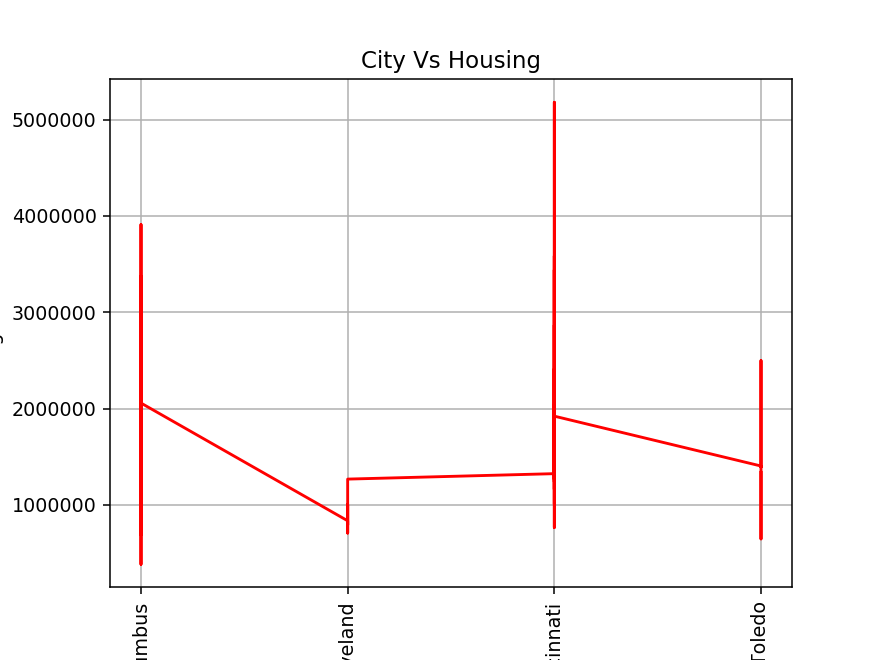

In [7]:


cityName = cityName1["City"]
housingMedian = cityName1["2017"]

# Plot the charts and apply some styling
Plot1, = plt.plot(cityName, housingMedian, color="red", label="Plot1")
plt.xticks(rotation=90)
plt.title("City Vs Housing")
plt.xlabel("City")
plt.ylabel("Housing Median")

plt.grid()
plt.show()

#plot_Zillow_Crime2017_df.plot(kind="scatter", x="City", y="2017", grid=True, figsize=(8,8),
 #             title="City Vs Housing")

#plt.show()